In [ ]:
# Sources for some parts of the code:
# https://www.codementor.io/@agarrahul01/multiclass-classification-using-random-forest-on-scikit-learn-library-hkk4lwawu
# https://machinelearningmastery.com/multinomial-logistic-regression-with-python/

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('amr_features_compound_relation.csv', sep = ';', header = 0)
print('Shape of the dataset: ' + str(dataset.shape))
print(dataset.head())

Shape of the dataset: (843, 107)
  Relation  sense_with_numbers  and  or  no_numbers_and_or  person  \
0    ABOUT                   1    0   0                  0       0   
1    ABOUT                   0    0   0                  1       0   
2     INST                   1    0   0                  0       0   
3     INST                   1    0   0                  0       0   
4       BE                   0    0   0                  1       0   

   capable-01  relation-03  game  edge  ...  newlines_count_16+  \
0           0            0     0     0  ...                   0   
1           0            0     0     0  ...                   0   
2           0            0     0     0  ...                   0   
3           0            0     0     0  ...                   0   
4           0            0     1     0  ...                   0   

   relation_in_AMR  one_bracket  end_brackets_5+  adj_count_2+  verb_count_2+  \
0                0            0                0             0

In [3]:
# Splitting the data into independent and dependent variables
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0

In [4]:
# Creating the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [5]:
# Defining the confusion matrix for later use # source: https://github.com/jjlira/nlp-with-transformers-tunstall Notebook: 02_classification.ipynb
labels = ["ABOUT", "ACTOR", "BE", "HAVE", "IN",  "INST"]

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

## **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_forest.fit(X_train, y_train)

In [31]:
forest_predictions = random_forest.predict(X_test)
print(forest_predictions)

['ACTOR' 'HAVE' 'INST' 'BE' 'INST' 'BE' 'INST' 'ABOUT' 'BE' 'BE' 'INST'
 'HAVE' 'INST' 'HAVE' 'HAVE' 'INST' 'ACTOR' 'ABOUT' 'ABOUT' 'INST' 'ABOUT'
 'BE' 'ACTOR' 'INST' 'ACTOR' 'BE' 'INST' 'BE' 'BE' 'BE' 'BE' 'HAVE'
 'ABOUT' 'BE' 'ACTOR' 'BE' 'INST' 'BE' 'ABOUT' 'BE' 'BE' 'INST' 'INST'
 'IN' 'HAVE' 'BE' 'BE' 'INST' 'BE' 'INST' 'BE' 'ABOUT' 'INST' 'BE' 'HAVE'
 'INST' 'INST' 'HAVE' 'BE' 'BE' 'INST' 'INST' 'HAVE' 'BE' 'INST' 'BE' 'BE'
 'INST' 'ABOUT' 'HAVE' 'INST' 'INST' 'HAVE' 'HAVE' 'ABOUT' 'INST' 'HAVE'
 'BE' 'INST' 'INST' 'INST' 'INST' 'INST' 'BE' 'INST' 'INST' 'INST' 'INST'
 'HAVE' 'INST' 'ABOUT' 'INST' 'ABOUT' 'INST' 'BE' 'INST' 'BE' 'ABOUT'
 'INST' 'INST' 'BE' 'BE' 'INST' 'BE' 'INST' 'INST' 'INST' 'INST' 'BE'
 'INST' 'ABOUT' 'IN' 'BE' 'INST' 'IN' 'INST' 'BE' 'BE' 'IN' 'BE' 'INST'
 'HAVE' 'INST' 'ABOUT' 'ABOUT' 'IN' 'HAVE' 'BE' 'INST' 'ABOUT' 'BE' 'INST'
 'BE' 'IN' 'HAVE' 'BE' 'INST' 'ACTOR' 'INST' 'INST' 'INST' 'ACTOR' 'BE'
 'HAVE' 'INST' 'BE' 'HAVE' 'BE' 'INST' 'BE' 'ABOUT' 'HAVE' 

In [8]:
accuracy_score(y_test, forest_predictions)

0.4028436018957346

In [29]:
pd.crosstab(y_test, forest_predictions, rownames=['Actual Relation'], colnames=['Predicted Relation'])

Predicted Relation,ABOUT,ACTOR,BE,HAVE,IN,INST
Actual Relation,,,,,,
ABOUT,12,1,2,4,1,7
ACTOR,4,6,2,4,0,7
BE,6,0,24,8,2,18
HAVE,0,0,10,4,3,8
IN,0,0,5,3,2,7
INST,3,1,14,5,1,37


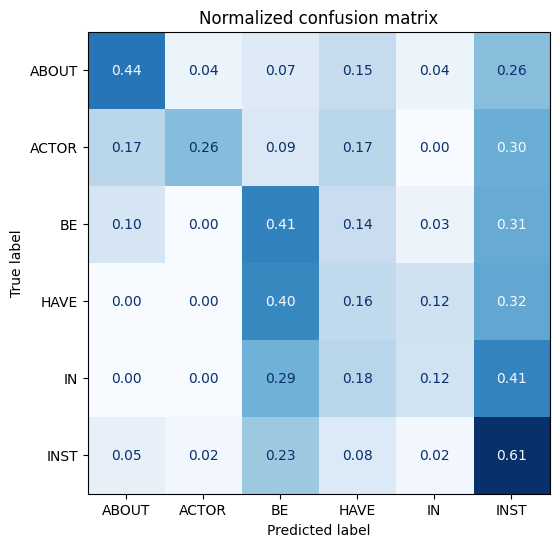

In [10]:
plot_confusion_matrix(forest_predictions, y_test, labels)

## **Decision Tree Classifier**

In [17]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 7).fit(X_train, y_train)
dtree_predictions = dtree.predict(X_test)
print(dtree_predictions)

['BE' 'BE' 'INST' 'BE' 'INST' 'BE' 'BE' 'BE' 'BE' 'BE' 'BE' 'BE' 'INST'
 'BE' 'BE' 'BE' 'ACTOR' 'BE' 'INST' 'INST' 'BE' 'BE' 'BE' 'INST' 'ACTOR'
 'BE' 'INST' 'BE' 'BE' 'BE' 'INST' 'BE' 'BE' 'BE' 'ACTOR' 'BE' 'INST' 'BE'
 'INST' 'BE' 'BE' 'BE' 'BE' 'BE' 'INST' 'INST' 'BE' 'BE' 'BE' 'INST'
 'INST' 'ABOUT' 'BE' 'INST' 'BE' 'INST' 'BE' 'BE' 'BE' 'INST' 'BE' 'INST'
 'INST' 'BE' 'INST' 'BE' 'BE' 'INST' 'ABOUT' 'INST' 'INST' 'INST' 'BE'
 'BE' 'BE' 'INST' 'BE' 'BE' 'BE' 'BE' 'BE' 'INST' 'BE' 'BE' 'BE' 'INST'
 'BE' 'BE' 'INST' 'BE' 'BE' 'BE' 'BE' 'INST' 'BE' 'BE' 'INST' 'INST'
 'INST' 'INST' 'BE' 'BE' 'INST' 'BE' 'INST' 'INST' 'BE' 'BE' 'BE' 'INST'
 'BE' 'BE' 'INST' 'INST' 'BE' 'INST' 'BE' 'BE' 'IN' 'BE' 'BE' 'BE' 'BE'
 'INST' 'BE' 'BE' 'HAVE' 'BE' 'INST' 'INST' 'BE' 'BE' 'BE' 'IN' 'BE' 'BE'
 'INST' 'ACTOR' 'BE' 'INST' 'BE' 'INST' 'BE' 'BE' 'INST' 'BE' 'BE' 'BE'
 'BE' 'BE' 'BE' 'INST' 'INST' 'BE' 'BE' 'BE' 'INST' 'INST' 'ACTOR' 'BE'
 'BE' 'BE' 'BE' 'BE' 'INST' 'BE' 'INST' 'BE' 'IN' 'INST' 'INST

In [18]:
accuracy_score(y_test, dtree_predictions)

0.3459715639810427

In [28]:
pd.crosstab(y_test, dtree_predictions, rownames=['Actual Relation'], colnames=['Predicted Relation'])

Predicted Relation,ABOUT,ACTOR,BE,HAVE,IN,INST
Actual Relation,,,,,,
ABOUT,4,0,17,0,0,6
ACTOR,0,4,9,0,0,10
BE,0,1,38,0,0,19
HAVE,0,0,17,1,1,6
IN,0,0,10,0,1,6
INST,0,0,35,0,1,25


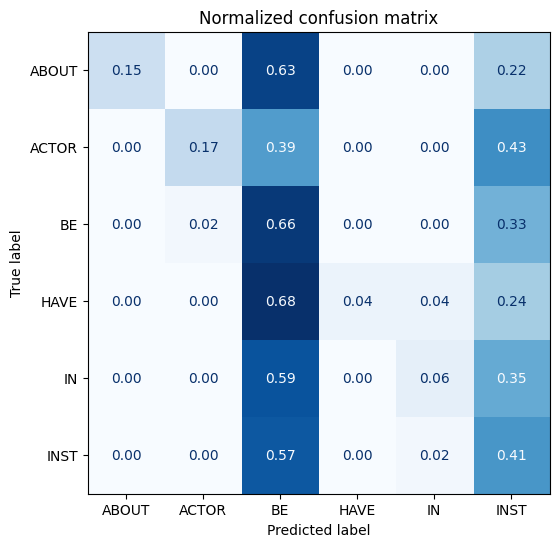

In [20]:
plot_confusion_matrix(dtree_predictions, y_test, labels)

## **Support Vector Machines**

In [21]:
from sklearn.svm import SVC
svm_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_linear.predict(X_test)
print(svm_predictions)

['ACTOR' 'INST' 'ACTOR' 'BE' 'INST' 'BE' 'INST' 'INST' 'BE' 'BE' 'INST'
 'ABOUT' 'INST' 'BE' 'BE' 'INST' 'ACTOR' 'ABOUT' 'INST' 'IN' 'ABOUT'
 'INST' 'IN' 'INST' 'ACTOR' 'BE' 'ACTOR' 'BE' 'BE' 'BE' 'INST' 'INST'
 'INST' 'BE' 'ACTOR' 'INST' 'INST' 'BE' 'INST' 'BE' 'INST' 'BE' 'INST'
 'IN' 'INST' 'BE' 'BE' 'INST' 'HAVE' 'INST' 'INST' 'ABOUT' 'INST' 'INST'
 'ABOUT' 'BE' 'INST' 'HAVE' 'BE' 'BE' 'INST' 'INST' 'INST' 'ABOUT' 'ACTOR'
 'BE' 'BE' 'INST' 'ABOUT' 'INST' 'BE' 'IN' 'HAVE' 'INST' 'BE' 'INST' 'BE'
 'BE' 'INST' 'INST' 'IN' 'INST' 'INST' 'BE' 'INST' 'INST' 'INST' 'INST'
 'INST' 'INST' 'ABOUT' 'INST' 'HAVE' 'INST' 'BE' 'INST' 'INST' 'ABOUT'
 'INST' 'INST' 'BE' 'BE' 'INST' 'INST' 'INST' 'INST' 'INST' 'INST' 'BE'
 'INST' 'INST' 'BE' 'BE' 'INST' 'BE' 'INST' 'BE' 'BE' 'IN' 'BE' 'INST'
 'ABOUT' 'INST' 'INST' 'INST' 'IN' 'HAVE' 'BE' 'INST' 'ABOUT' 'BE' 'BE'
 'BE' 'HAVE' 'INST' 'INST' 'INST' 'ACTOR' 'INST' 'INST' 'INST' 'IN' 'INST'
 'ABOUT' 'INST' 'BE' 'HAVE' 'BE' 'INST' 'BE' 'ABOUT' 'ABOUT' 'B

In [24]:
accuracy_score(y_test, svm_predictions)

0.46919431279620855

In [27]:
pd.crosstab(y_test, svm_predictions, rownames=['Actual Relation'], colnames=['Predicted Relation'])

Predicted Relation,ABOUT,ACTOR,BE,HAVE,IN,INST
Actual Relation,,,,,,
ABOUT,12,0,2,1,1,11
ACTOR,1,8,3,1,0,10
BE,2,0,25,1,2,28
HAVE,1,1,11,6,1,5
IN,0,0,4,2,3,8
INST,2,0,9,1,4,45


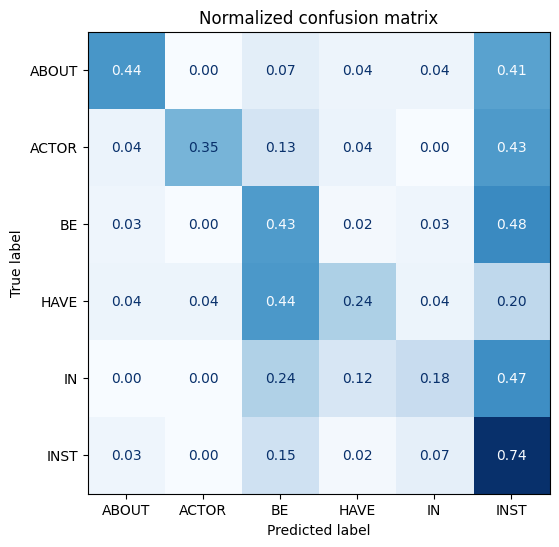

In [ ]:
plot_confusion_matrix(svm_predictions, y_test, labels)

## **K-Nearest Neighbors Classifier**

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print(knn_predictions)

['ACTOR' 'ABOUT' 'INST' 'BE' 'INST' 'BE' 'INST' 'ABOUT' 'BE' 'BE' 'ABOUT'
 'HAVE' 'INST' 'BE' 'BE' 'INST' 'ACTOR' 'BE' 'ABOUT' 'IN' 'ABOUT' 'BE'
 'BE' 'ABOUT' 'ACTOR' 'BE' 'INST' 'BE' 'BE' 'INST' 'ABOUT' 'ABOUT' 'BE'
 'BE' 'BE' 'BE' 'BE' 'BE' 'ACTOR' 'BE' 'BE' 'INST' 'BE' 'INST' 'INST' 'BE'
 'BE' 'INST' 'BE' 'ACTOR' 'ABOUT' 'ABOUT' 'INST' 'ACTOR' 'HAVE' 'INST'
 'INST' 'HAVE' 'BE' 'INST' 'BE' 'ACTOR' 'IN' 'BE' 'ABOUT' 'BE' 'BE'
 'ACTOR' 'ABOUT' 'ACTOR' 'INST' 'INST' 'HAVE' 'IN' 'BE' 'ABOUT' 'BE' 'BE'
 'BE' 'INST' 'BE' 'ACTOR' 'ABOUT' 'BE' 'BE' 'ACTOR' 'INST' 'INST' 'HAVE'
 'ABOUT' 'ABOUT' 'INST' 'ABOUT' 'INST' 'BE' 'INST' 'ACTOR' 'ABOUT' 'INST'
 'ABOUT' 'BE' 'BE' 'BE' 'BE' 'INST' 'ACTOR' 'INST' 'ABOUT' 'BE' 'BE'
 'ABOUT' 'BE' 'BE' 'ACTOR' 'ABOUT' 'INST' 'BE' 'BE' 'INST' 'BE' 'INST'
 'IN' 'BE' 'ABOUT' 'BE' 'HAVE' 'HAVE' 'BE' 'INST' 'ABOUT' 'BE' 'BE' 'BE'
 'BE' 'BE' 'INST' 'ACTOR' 'ACTOR' 'INST' 'BE' 'INST' 'ACTOR' 'BE' 'BE'
 'INST' 'BE' 'HAVE' 'BE' 'ACTOR' 'BE' 'BE' 'ABOUT' 'INST' 'INST'

In [34]:
accuracy_score(y_test, knn_predictions)

0.35071090047393366

In [35]:
pd.crosstab(y_test, knn_predictions, rownames=['Actual Relation'], colnames=['Predicted Relation'])

Predicted Relation,ABOUT,ACTOR,BE,HAVE,IN,INST
Actual Relation,,,,,,
ABOUT,9,1,10,0,1,6
ACTOR,4,7,6,2,1,3
BE,9,7,26,4,1,11
HAVE,3,1,15,3,0,3
IN,2,0,8,3,1,3
INST,6,6,19,1,1,28


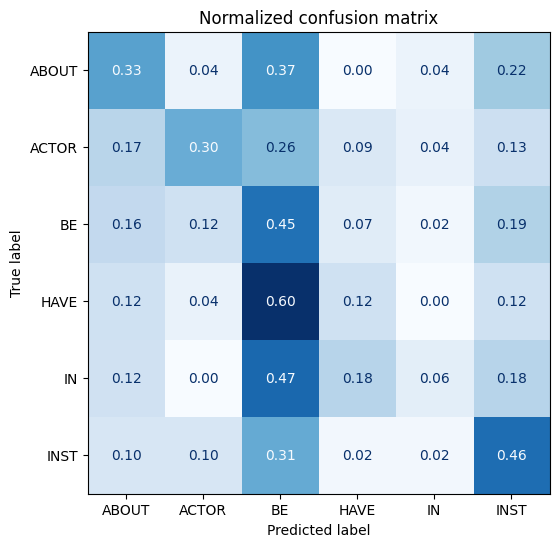

In [36]:
plot_confusion_matrix(knn_predictions, y_test, labels)

##  **Logistic Regression Classifier**

In [40]:
from sklearn.linear_model import LogisticRegression
loreg_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X_train, y_train)
loreg = loreg_model.fit(X_train, y_train)
loreg_predictions = loreg.predict(X_test)
print(loreg_predictions)

['ACTOR' 'ABOUT' 'HAVE' 'BE' 'INST' 'BE' 'INST' 'INST' 'BE' 'BE' 'IN'
 'ACTOR' 'INST' 'INST' 'BE' 'INST' 'ACTOR' 'ABOUT' 'INST' 'INST' 'ABOUT'
 'INST' 'IN' 'INST' 'ACTOR' 'BE' 'INST' 'INST' 'BE' 'BE' 'INST' 'ABOUT'
 'INST' 'INST' 'ACTOR' 'INST' 'INST' 'BE' 'INST' 'BE' 'INST' 'INST' 'INST'
 'INST' 'INST' 'BE' 'BE' 'INST' 'HAVE' 'INST' 'BE' 'ABOUT' 'INST' 'INST'
 'INST' 'BE' 'ABOUT' 'HAVE' 'BE' 'BE' 'INST' 'INST' 'INST' 'BE' 'ACTOR'
 'BE' 'BE' 'INST' 'ABOUT' 'INST' 'BE' 'INST' 'HAVE' 'ABOUT' 'BE' 'INST'
 'HAVE' 'BE' 'INST' 'INST' 'INST' 'INST' 'INST' 'BE' 'INST' 'INST' 'INST'
 'INST' 'INST' 'INST' 'IN' 'INST' 'HAVE' 'INST' 'BE' 'INST' 'INST' 'ABOUT'
 'INST' 'INST' 'BE' 'BE' 'INST' 'INST' 'INST' 'INST' 'INST' 'INST' 'BE'
 'INST' 'ABOUT' 'HAVE' 'BE' 'INST' 'HAVE' 'INST' 'BE' 'BE' 'IN' 'BE'
 'INST' 'HAVE' 'INST' 'INST' 'ABOUT' 'IN' 'HAVE' 'BE' 'INST' 'ABOUT' 'BE'
 'BE' 'BE' 'HAVE' 'INST' 'INST' 'INST' 'ACTOR' 'INST' 'INST' 'INST' 'IN'
 'INST' 'HAVE' 'INST' 'BE' 'HAVE' 'BE' 'INST' 'BE' 'ABOU

In [41]:
accuracy_score(y_test, loreg_predictions)

0.4881516587677725

In [45]:
pd.crosstab(y_test, loreg_predictions, rownames=['Actual Relation'], colnames=['Predicted Relation'])

Predicted Relation,ABOUT,ACTOR,BE,HAVE,IN,INST
Actual Relation,,,,,,
ABOUT,14,0,2,2,2,7
ACTOR,1,7,3,2,0,10
BE,4,2,25,3,0,24
HAVE,1,0,10,7,1,6
IN,0,0,3,3,1,10
INST,1,0,7,1,3,49


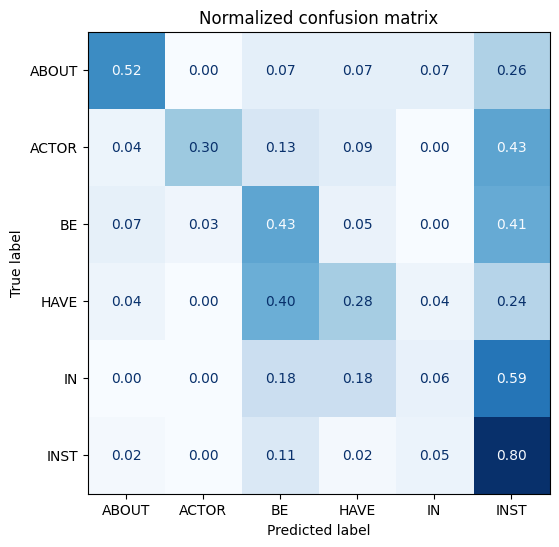

In [46]:
plot_confusion_matrix(loreg_predictions, y_test, labels)

Feature Importance (finding out which features are the most important features since the logistic regression classifier obtained the best results)
source: https://forecastegy.com/posts/feature-importance-in-logistic-regression/

In [47]:
loregcoef = loreg.coef_
loregcoef.shape

(6, 106)

In [49]:
x = dataset.iloc[:,1:]
avg_importance = np.mean(np.abs(loregcoef), axis=0)
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

In [51]:
print(feature_importance)

            Feature  Importance
80      responsible    0.000000
46          play-11    0.163990
83           create    0.176013
78       commission    0.182067
34         language    0.189132
..              ...         ...
76             team    0.669738
9             phase    0.744664
97  relation_in_AMR    0.764036
8              edge    0.777409
4            person    0.892062

[106 rows x 2 columns]


<Axes: ylabel='Feature'>

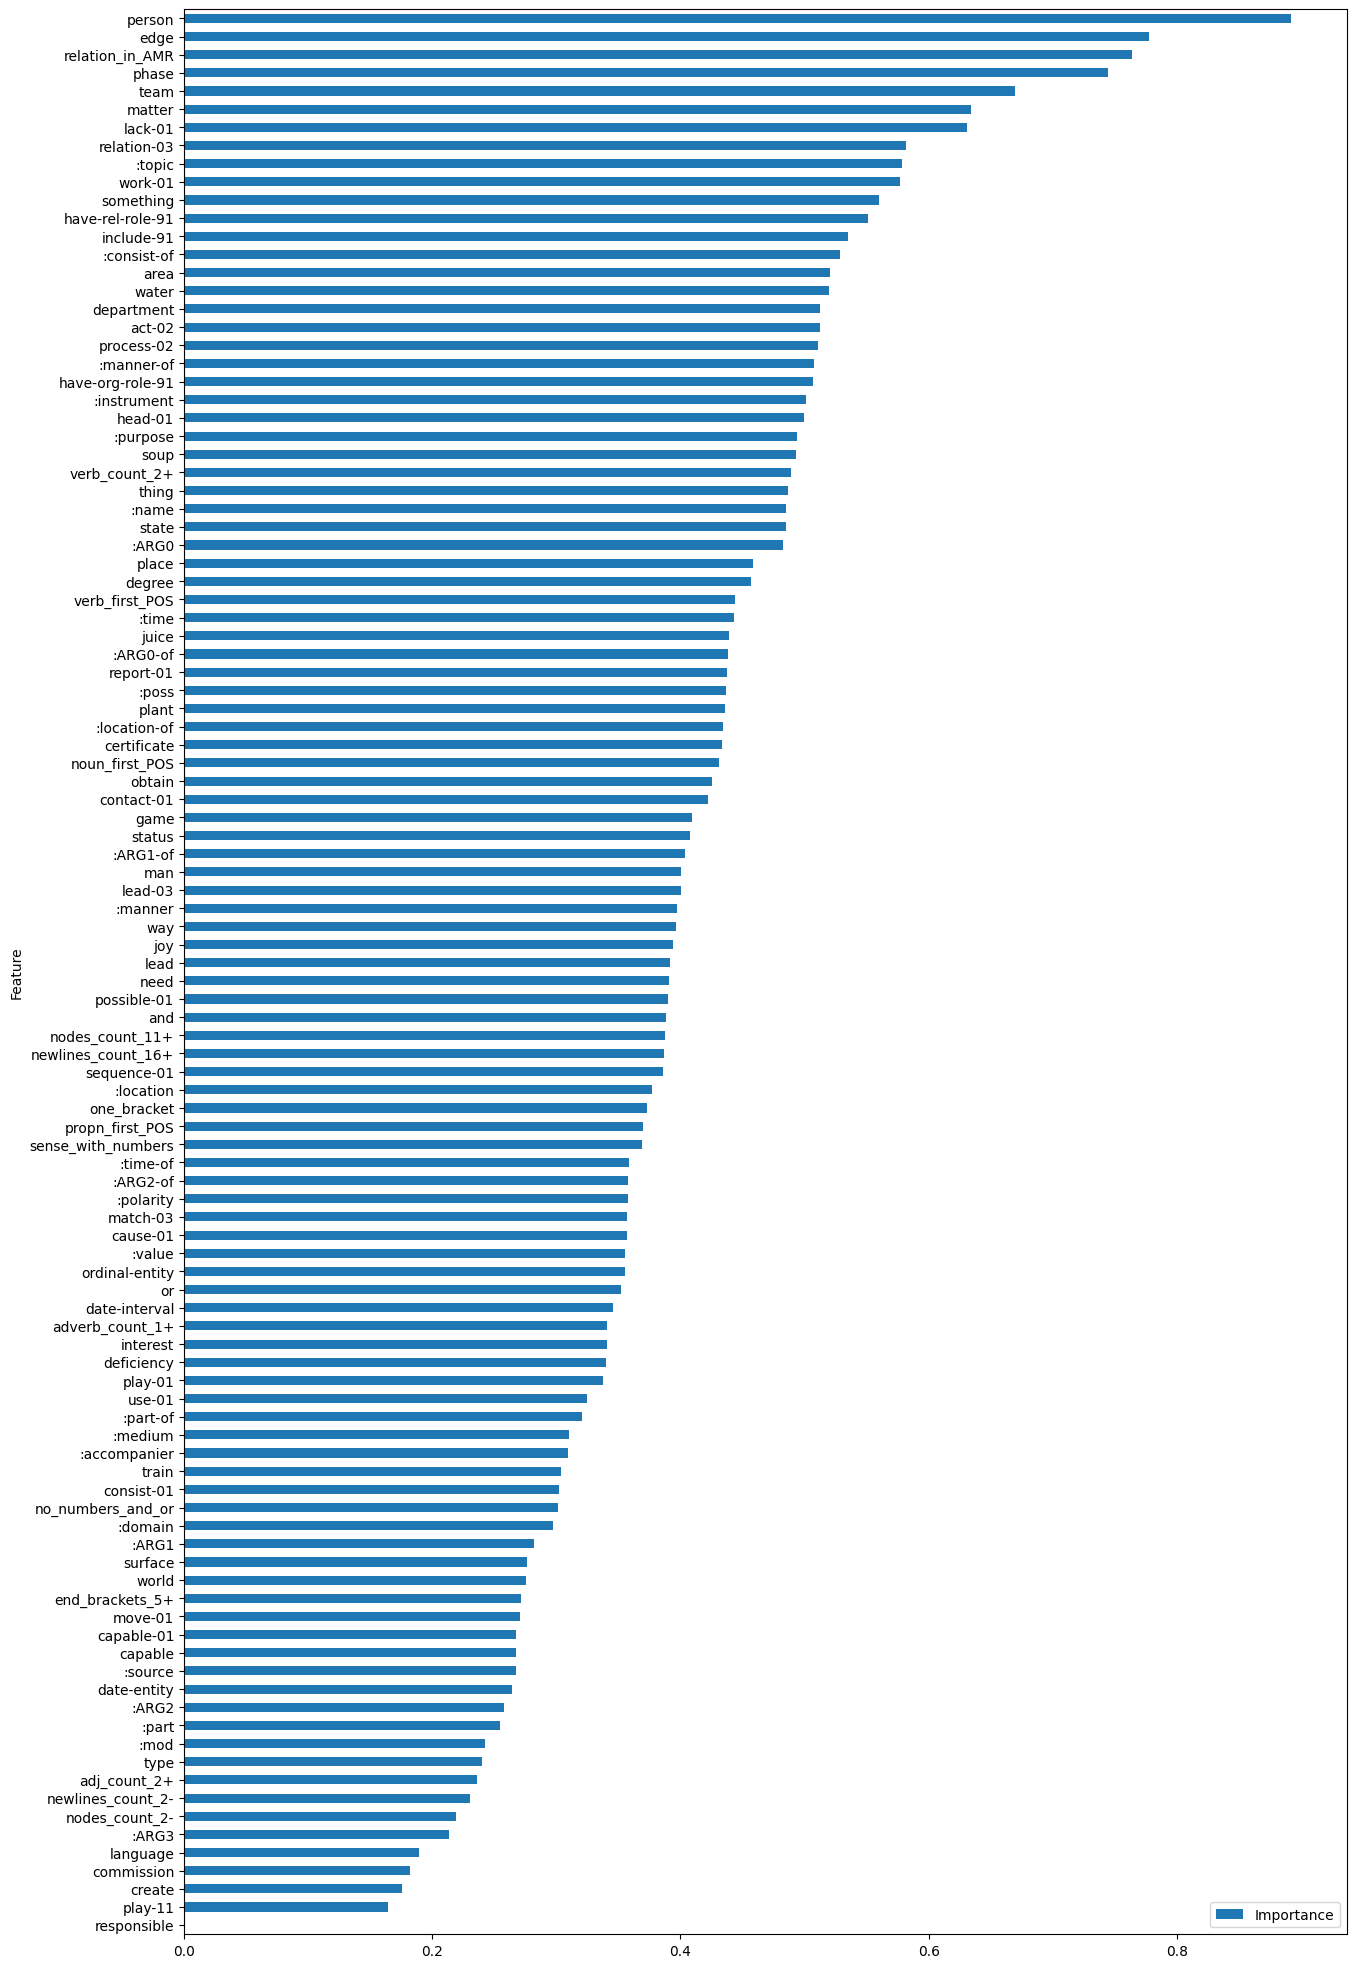

In [52]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 25))

##  **Dummy Classifier**

In [57]:
from sklearn.dummy import DummyClassifier
dummy_frequent = DummyClassifier(strategy='most_frequent')
frequent = dummy_frequent.fit(X_train, y_train)
frequent_predictions = frequent.predict(X_test)

In [59]:
accuracy_score(y_test, frequent_predictions)

0.2890995260663507

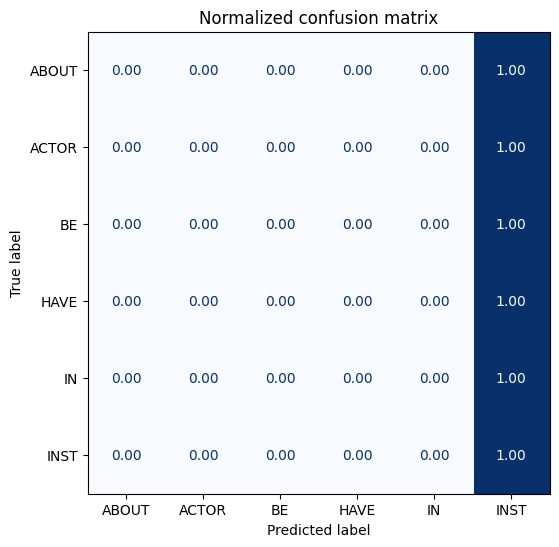

In [60]:
plot_confusion_matrix(frequent_predictions, y_test, labels)

In [62]:
dummy_uniform = DummyClassifier(strategy='uniform', random_state = 42)
uniform = dummy_uniform.fit(X_train, y_train)
uniform_predictions = uniform.predict(X_test)

In [63]:
accuracy_score(y_test, uniform_predictions)

0.16113744075829384

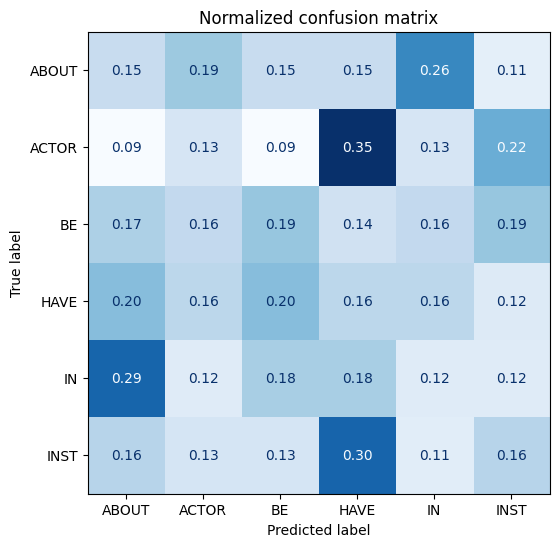

In [65]:
plot_confusion_matrix(uniform_predictions, y_test, labels)

In [68]:
dummy_stratified = DummyClassifier(strategy='stratified',random_state = 42)
stratified = dummy_stratified.fit(X_train, y_train)
stratified_predictions = stratified.predict(X_test)

In [69]:
accuracy_score(y_test, stratified_predictions)

0.21800947867298578

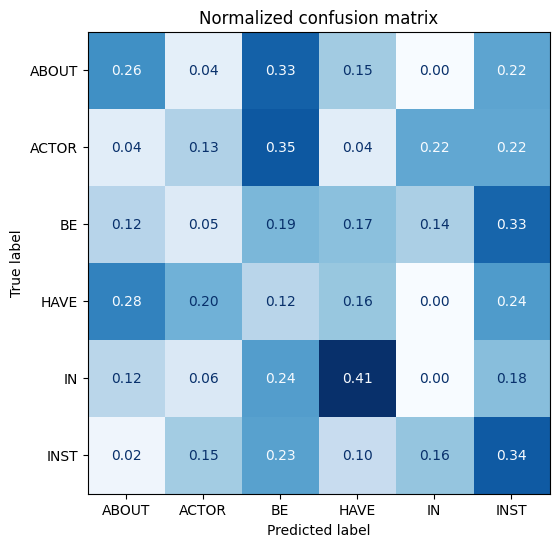

In [70]:
plot_confusion_matrix(stratified_predictions, y_test, labels)